In [14]:
import scipy.stats as s
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [298]:
class unnormalizedDist:
    def __init__(self):
        """Predefine parameters for normals"""
        self.var2 = 6
        self.mu2  =0.5
        self.mu = 7
        self.var = 2
      
        
    def pdf(self,x):
        """Evaluate unnormalized pdf"""
        g = self.unnorm_gaus2(x)
        n = self.unnorm_gauss(x)
        c = self.unnorm_cauchy(x)
        return g+n+c
    
    def unnorm_gauss(self,x):
        """Unnormalized Gaussian"""
        return np.exp((-1/(2*self.var))*(x-self.mu)**2)
    
    def unnorm_gaus2(self,x):
        """Unnormalized Gaussian"""
        return np.exp((-1/(2*self.var2))*(x-self.mu2)**2)
    
    def unnorm_cauchy(self,x):
        """Unnormalized Cauchy"""
        return (1/(1+x**2))

In [299]:
x= np.arange(-30,50,0.2) 

In [304]:
p = unnormalizedDist()

norm = s.norm(1.5,5)#Freeze our trial distribution as a normal mean 1.5, var 5 
k=28#Our Multiplier to envelope unnormalized distributed

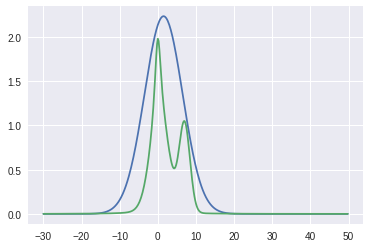

In [306]:
plt.plot(x,norm.pdf(x)*k) #envelope distribution
plt.plot(x,p.pdf(x)) #Unnormalized distribution

In [311]:

xp = np.random.random(10000)
z = norm.ppf(xp)
u = np.random.uniform(low=0,high=k*norm.pdf(z))
samples = z[np.where(p.pdf(z)>=u)]
print("Number of accepted samples:", len(samples))

Number of accepted samples: 4493


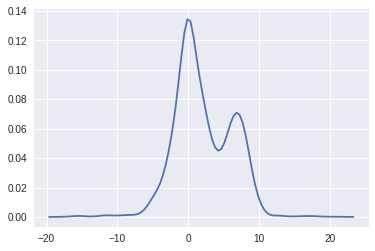

In [310]:
sns.kdeplot(samples)

So we have been able to sample from an arbitary and non-analytic distribution. The only problem is efficiency - nearly 50% of the samples were rejected in this case.